In [ ]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.3/65.3 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.4 MB/s eta 0:00:00


In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.8/148.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.6/51.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.7/170.7 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


In [ ]:
import pandas as pd

In [ ]:
data= pd.read_excel('/content/database_non-shows (2) (3).xlsx')

In [ ]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sklearn.model_selection import ParameterGrid
import pandas as pd

# Supongamos que tienes tus datos de entrenamiento en un DataFrame llamado 'data'
# Definir la metadata del DataFrame
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

# Definir los parámetros que quieres ajustar
param_grid = {
    'generator_dim': [(256, 256), (512, 512)],
    'discriminator_dim': [(256, 256), (512, 512)],
    'discriminator_lr': [1e-5, 2e-4],
    'generator_lr': [1e-5, 2e-4],
    'enforce_rounding': [True]
}

# Crear combinaciones de hiperparámetros
grid = ParameterGrid(param_grid)

best_model = None
best_score = float('-inf')

# Evaluar cada combinación de hiperparámetros
for params in grid:
    model = CTGANSynthesizer(
        metadata=metadata,  # Asegurarse de pasar la metadata al inicializar
        generator_dim=params['generator_dim'],
        discriminator_dim=params['discriminator_dim'],
        discriminator_lr=params['discriminator_lr'],
        generator_lr=params['generator_lr'],
        enforce_rounding=params['enforce_rounding']
    )

    # Entrenar el modelo
    model.fit(data)

    # Generar el doble de muestras sintéticas en comparación con el tamaño original
    synthetic_data = model.sample(len(data) * 2)

    # Evaluar la calidad general utilizando las métricas integradas de SDV
    quality_report = evaluate_quality(
        real_data=data,
        synthetic_data=synthetic_data,
        metadata=metadata
    )

    # Obtener el puntaje de calidad general
    overall_score = quality_report.get_score()


    if overall_score > best_score:
        best_score = overall_score
        best_model = model
        best_synthetic_data = synthetic_data


if best_synthetic_data is not None:
    best_synthetic_data.to_excel("synthetic_data_in.xlsx", index=False)

print("Mejor combinación de hiperparámetros:", best_model.get_parameters())
print("Mejor puntaje de calidad:", best_score)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 50.15it/s]|
Column Shapes Score: 93.72%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:06<00:00, 11.37it/s]|
Column Pair Trends Score: 84.13%

Overall Score (Average): 88.93%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 120.07it/s]|
Column Shapes Score: 75.74%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:05<00:00, 14.22it/s]|
Column Pair Trends Score: 69.98%

Overall Score (Average): 72.86%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 63.29it/s]|
Column Shapes Score: 91.4%

(2/2) Evaluating Column Pair Trends: |██████████| 78/78 [00:06<00:00, 11.57it/s]|
Column Pair Trends Score: 81.51%

Overall Score (Average): 86.45%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 13/13 [00:00<00:00, 72.63it/s]|
Column Shapes Score: 71.89%

(2/2) Evaluating Column Pair Trends: 

In [ ]:
data= pd.read_excel('/content/database_non-shows (2) (3).xlsx')

In [ ]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata
from sdv.evaluation.single_table import evaluate_quality
from sklearn.model_selection import ParameterGrid
import pandas as pd

# Supongamos que tienes tus datos de entrenamiento en un DataFrame llamado 'data'
# Definir la metadata del DataFrame
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data)

In [ ]:
synthesizer = CTGANSynthesizer(
    metadata,  # requerido
    enforce_min_max_values=True,
    enforce_rounding=True,
    locales=['en_US'],
    embedding_dim=128,
    generator_dim=(512, 512),
    discriminator_dim=(512, 512),
    generator_lr=1e-05,
    generator_decay=1e-06,
    discriminator_lr=0.0002,
    discriminator_decay=1e-06,
    batch_size=500,
    discriminator_steps=1,
    log_frequency=True,
    verbose=False,
    epochs=300,
    pac=10,
    cuda=True
)

/usr/local/lib/python3.10/dist-packages/sdv/single_table/base.py:97: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


In [ ]:
# Ajustar el sintetizador con los datos originales
synthesizer.fit(data)

In [ ]:
# Calcular la proporción de cada clase en la columna objetivo ('Appointment Type')
class_proportions = data['Appointment Type'].value_counts(normalize=True)

# Determinar el número de filas a generar, manteniendo la proporción de cada clase
num_rows = len(data) * 2
num_rows_class_0 = int(num_rows * class_proportions[0])  # Número de muestras para clase 0
num_rows_class_1 = num_rows - num_rows_class_0           # Número de muestras para clase 1

# Generar muestras sintéticas totales
synthetic_data = synthesizer.sample(num_rows=num_rows)

# Ajustar las muestras para que mantengan la proporción de las clases
synthetic_data_class_0 = synthetic_data[synthetic_data['Appointment Type'] == 0].sample(n=num_rows_class_0, replace=True)
synthetic_data_class_1 = synthetic_data[synthetic_data['Appointment Type'] == 1].sample(n=num_rows_class_1, replace=True)

# Combinar las muestras sintéticas ajustadas
synthetic_data_final = pd.concat([synthetic_data_class_0, synthetic_data_class_1])

In [ ]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=data,
    synthetic_data=synthetic_data_final,
    column_name='Appointment Type',
    metadata=metadata
)

fig.show()

In [ ]:
# Guardar el DataFrame en un archivo Excel
synthetic_data_final.to_excel('data_sintetica_IN1.xlsx', index=False)

In [ ]:
synthetic_data_final['Appointment Type'].value_counts()

,count
Appointment Type,
1,24306
0,12868


In [ ]:
synthesizer.get_loss_values()

,Epoch,Generator Loss,Discriminator Loss
0,0,2.520866,-3.791500
1,1,1.395215,-4.109334
2,2,0.853735,-3.848236
3,3,0.647299,-3.131067
4,4,0.163667,-2.766767
...,...,...,...
295,295,-2.155110,-0.288970
296,296,-1.881450,-0.149648
297,297,-1.851504,-0.426322
298,298,-1.939180,-0.009078


In [ ]:
fig = synthesizer.get_loss_values_plot()
fig.show()

In [ ]:
import pandas as pd
import numpy as np

# Función para calcular estadísticos básicos: media, mediana, moda y desviación estándar
def calculate_statistics(df):
    stats_dict = {
        'mean': df.mean(),
        'median': df.median(),
        'mode': df.mode().iloc[0],
        'std': df.std()
    }
    return pd.DataFrame(stats_dict)

# Calcular estadísticos para el conjunto de datos original y sintético
original_stats = calculate_statistics(data)
synthetic_stats = calculate_statistics(synthetic_data_final)

# Función para combinar estadísticas de original y sintético de forma alternada
def combine_statistics_alternating_v2(original_stats, synthetic_stats):
    comparison = pd.DataFrame()

    # Iterar por cada estadístico y añadir columnas intercaladas
    for stat in ['mean', 'median', 'mode', 'std']:
        comparison[f'Original_{stat}'] = original_stats[stat]
        comparison[f'Synthetic_{stat}'] = synthetic_stats[stat]

    return comparison


comparison_stats_alternating_v2 = combine_statistics_alternating_v2(original_stats, synthetic_stats)

In [ ]:
comparison_stats_alternating_v2

,Original_mean,Synthetic_mean,Original_median,Synthetic_median,Original_mode,Synthetic_mode,Original_std,Synthetic_std
Appointment Type,0.653844,0.653844,1.0,1.0,1,1,0.475756,0.475750
Age,50.152903,52.653172,50.0,52.0,60,55,17.123270,18.891254
Sex,0.380804,0.426427,0.0,0.0,0,0,0.489240,0.543986
Insurance Type,2.792167,2.871012,3.0,3.0,3,3,0.891696,1.336871
Number of Diseases,1.435519,1.699925,1.0,1.0,1,1,1.111154,1.538673
Recent Hospitalization,0.037553,0.215527,0.0,0.0,0,0,0.207959,0.769779
Number of Medications,0.543229,0.529510,0.0,0.0,0,0,1.232169,1.207197
Hour,11.582235,11.656427,11.0,11.0,13,13,2.761017,2.725608
Day,2.790176,2.917792,3.0,3.0,0,0,2.046901,2.072858
Month,6.216926,6.079706,7.0,6.0,9,8,2.773017,2.739189


In [ ]:
comparison_stats_alternating_v2.to_excel('comparison_stats_alternating.xlsx')

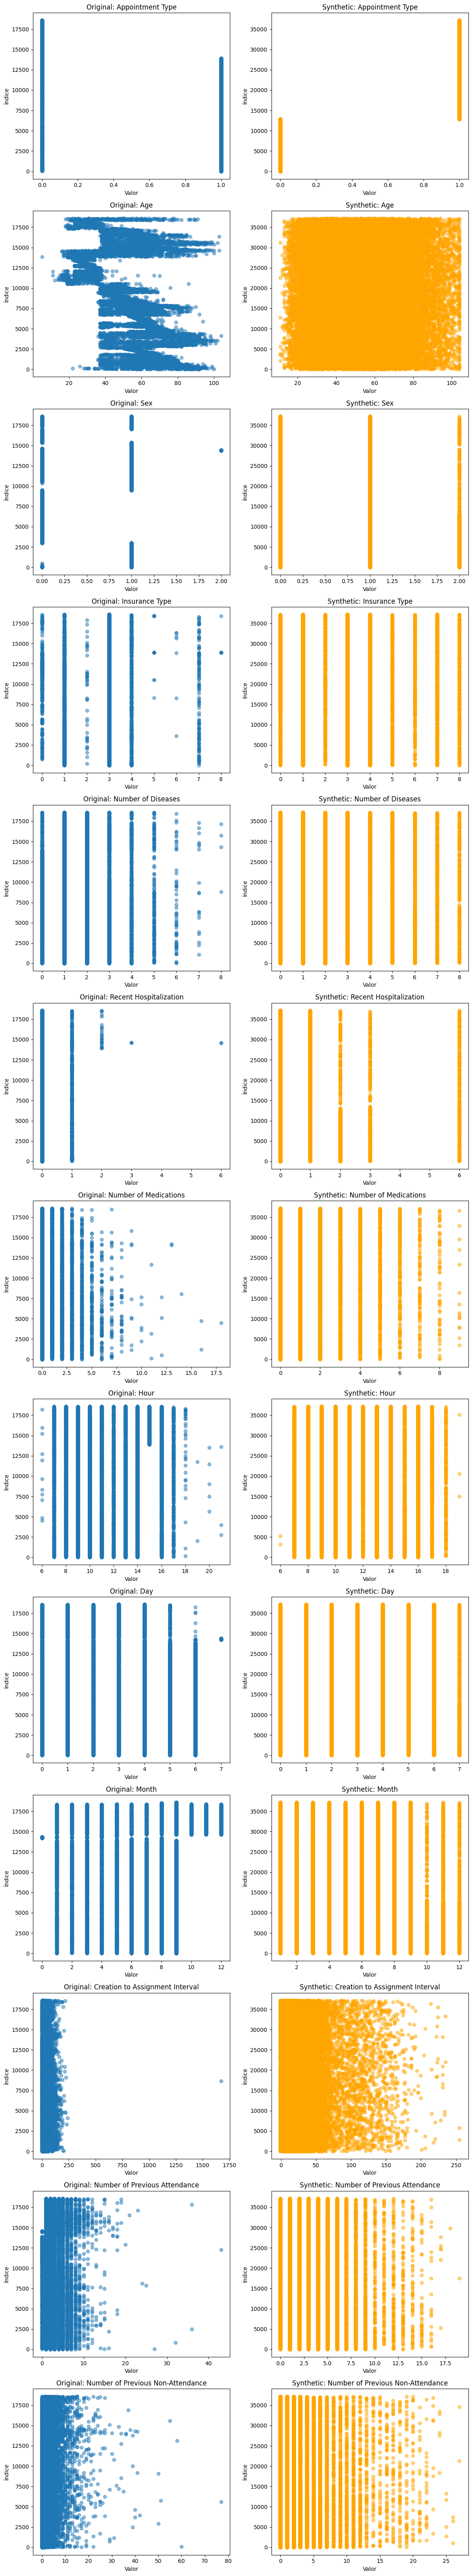

In [ ]:
import matplotlib.pyplot as plt

# Función para crear gráficos de dispersión para cada columna
def plot_comparison(original_data, synthetic_data):
    columns = original_data.columns
    num_cols = len(columns)

    # Crear subplots con dos columnas y tantas filas como columnas haya en los datos
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))

    for i, col in enumerate(columns):
        # Gráfico de la columna original
        axes[i, 0].scatter(original_data[col], range(len(original_data)), label='Original', alpha=0.5)
        axes[i, 0].set_title(f'Original: {col}')
        axes[i, 0].set_xlabel('Valor')
        axes[i, 0].set_ylabel('Índice')

        # Gráfico de la columna sintética
        axes[i, 1].scatter(synthetic_data[col], range(len(synthetic_data)), label='Synthetic', alpha=0.5, color='orange')
        axes[i, 1].set_title(f'Synthetic: {col}')
        axes[i, 1].set_xlabel('Valor')
        axes[i, 1].set_ylabel('Índice')

    plt.tight_layout()
    plt.show()

# Graficar la comparación de la dispersión entre los datos originales y sintéticos
plot_comparison(data, synthetic_data_final)

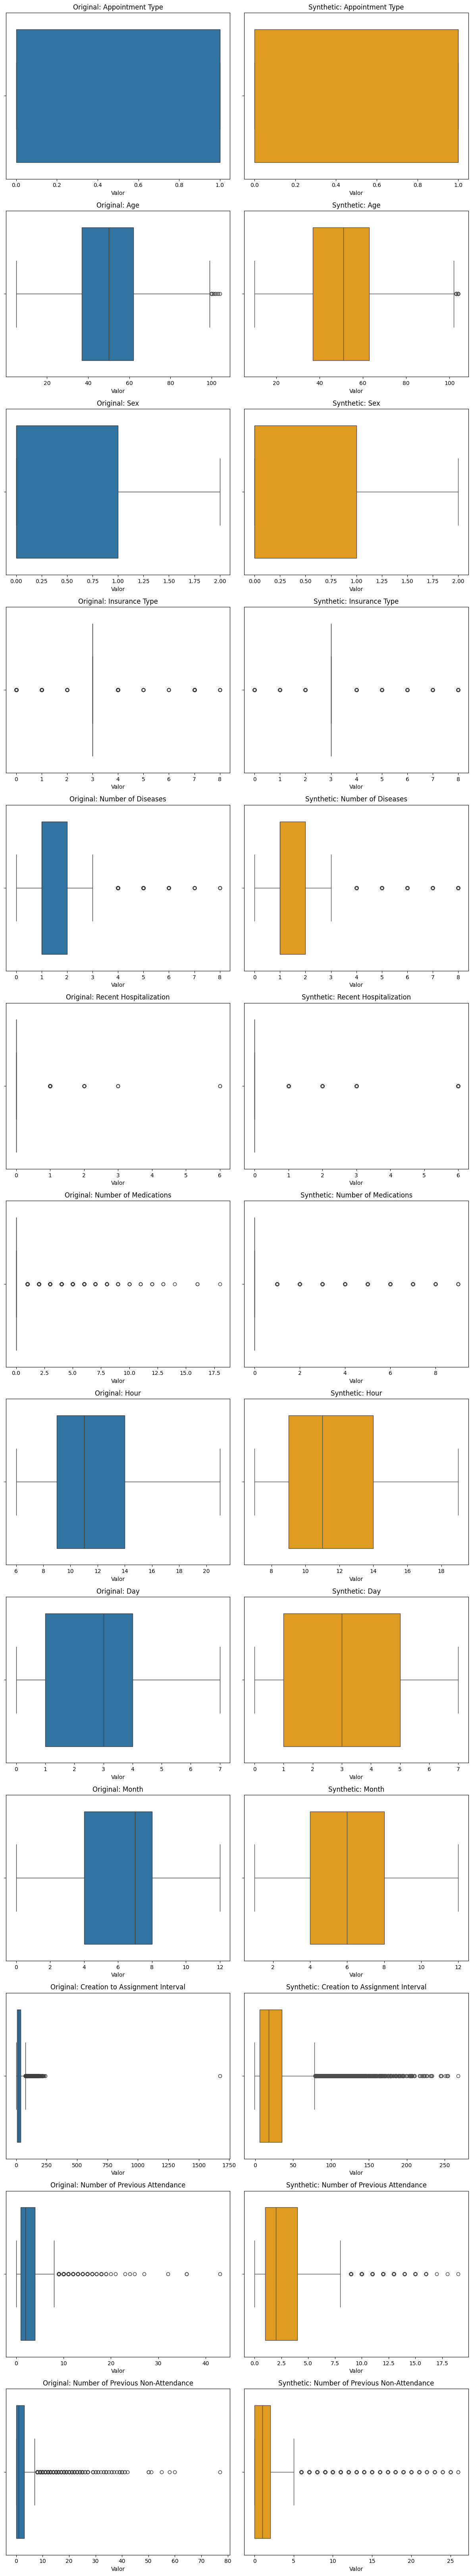

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Función para crear box plots para cada columna
def plot_comparison(original_data, synthetic_data):
    columns = original_data.columns
    num_cols = len(columns)

    # Crear subplots con dos columnas y tantas filas como columnas haya en los datos
    fig, axes = plt.subplots(nrows=num_cols, ncols=2, figsize=(12, 5 * num_cols))

    for i, col in enumerate(columns):
        # Box plot de la columna original
        sns.boxplot(data=original_data[col], ax=axes[i, 0], orient='h')
        axes[i, 0].set_title(f'Original: {col}')
        axes[i, 0].set_xlabel('Valor')

        # Box plot de la columna sintética
        sns.boxplot(data=synthetic_data[col], ax=axes[i, 1], orient='h', color='orange')
        axes[i, 1].set_title(f'Synthetic: {col}')
        axes[i, 1].set_xlabel('Valor')

    plt.tight_layout()
    plt.show()

# Graficar la comparación de box plots entre los datos originales y sintéticos
plot_comparison(data, synthetic_data_final)

##Unión de datasets

In [ ]:
data_original=pd.read_excel('/content/database_non-shows (2) (3).xlsx')

In [ ]:
data_original['Appointment Type'].value_counts()

,count
Appointment Type,
1,12153
0,6434


In [ ]:
data_sintetica= pd.read_excel('/content/data_sintetica_IN1.xlsx')

In [ ]:
# Calcular el número de muestras de cada clase en la columna 'Appointment Type' en la data original
count_class_0 = len(data_original[data_original['Appointment Type'] == 0])
count_class_1 = len(data_original[data_original['Appointment Type'] == 1])

# Determinar cuántas muestras adicionales de la clase 0 necesitamos
samples_needed = count_class_1 - count_class_0

# Tomar muestras aleatorias de la clase 0 en la data sintética
synthetic_class_0 = data_sintetica[data_sintetica['Appointment Type'] == 0].sample(n=samples_needed, replace=False)

# Unir la data original con las muestras sintéticas de la clase 0
data_combined = pd.concat([data_original, synthetic_class_0], ignore_index=True)

print(f"Distribución de clases en la data combinada:\n{data_combined['Appointment Type'].value_counts()}")

Distribución de clases en la data combinada:
Appointment Type
1    12153
0    12153
Name: count, dtype: int64


In [ ]:
data_combined.to_excel('data_combined.xlsx', index=False)